In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

data = pd.read_csv("global_heat_index.csv")
print("Loaded data shape:", data.shape)  # Debugging
clean1 = data[data['Hour'] < 6]
clean2 = data[data['Hour'] > 18]
data = data.drop(clean1.index, axis=0)
data = data.drop(clean2.index, axis=0)
data = data.drop(['Year', 'Month', 'Day'], axis=1)

# Prepare the data for clustering
x = data.iloc[:,1:8].values  # Use columns from 1 to 7 as features
y = data.iloc[:, 7].values  # Use column 7 (index 7) as the target variable


Loaded data shape: (17520, 11)


In [4]:
x

array([[  2.        ,   7.80670458, 986.2491455 , ...,  95.83598328,
          1.81517458,   0.        ],
       [  2.        ,   9.03640845, 987.0389404 , ..., 105.1981812 ,
          1.61531019,   0.        ],
       [  3.        ,  12.15828049, 987.8973999 , ..., 113.3176651 ,
          1.43908835, 159.        ],
       ...,
       [ -7.        ,  19.96804137, 983.6603394 , ...,  17.50789642,
          2.19113112, 221.        ],
       [ -5.        ,  16.70651682, 983.7686768 , ...,  29.40781403,
          2.67560554,  16.        ],
       [ -6.        ,  15.60574869, 984.2324829 , ...,  42.64258194,
          3.11116815,   0.        ]])

In [17]:
data.head()

,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [4]:
data.columns


Index(['Hour', 'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity',
       'Wind Direction', 'Wind Speed', 'Solar Radiation (GHI)'],
      dtype='object')

In [5]:
data.shape

(9490, 8)

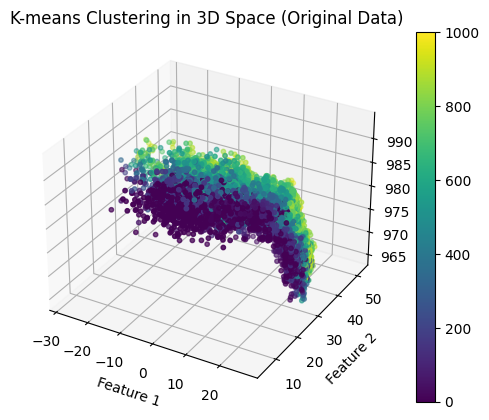

In [20]:


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot using the original features for x, y, and z axes, and cluster labels for color mapping
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap='viridis', s=10)
fig.colorbar(sc)  # Add a colorbar to indicate the cluster labels

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title('K-means Clustering in 3D Space (Original Data)')
plt.show()


In [6]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [7]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.labels = None

    def fit(self, data):
        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iters):
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([data[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            if np.allclose(self.centroids, new_centroids, atol=self.tol):
                break
            self.centroids = new_centroids

In [8]:
# Standardize the features
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [9]:
# K-means clustering
kmeans = KMeans(n_clusters=6, tol=1e-4)
kmeans.fit(x)
labels = kmeans.labels

In [10]:
# PCA implementation
def pca(data, num_components):
    cov_matrix = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:num_components]]
    transformed_data = np.dot(data, top_eigenvectors)
    return transformed_data

num_components = 2
pca_model = pca(x, num_components)

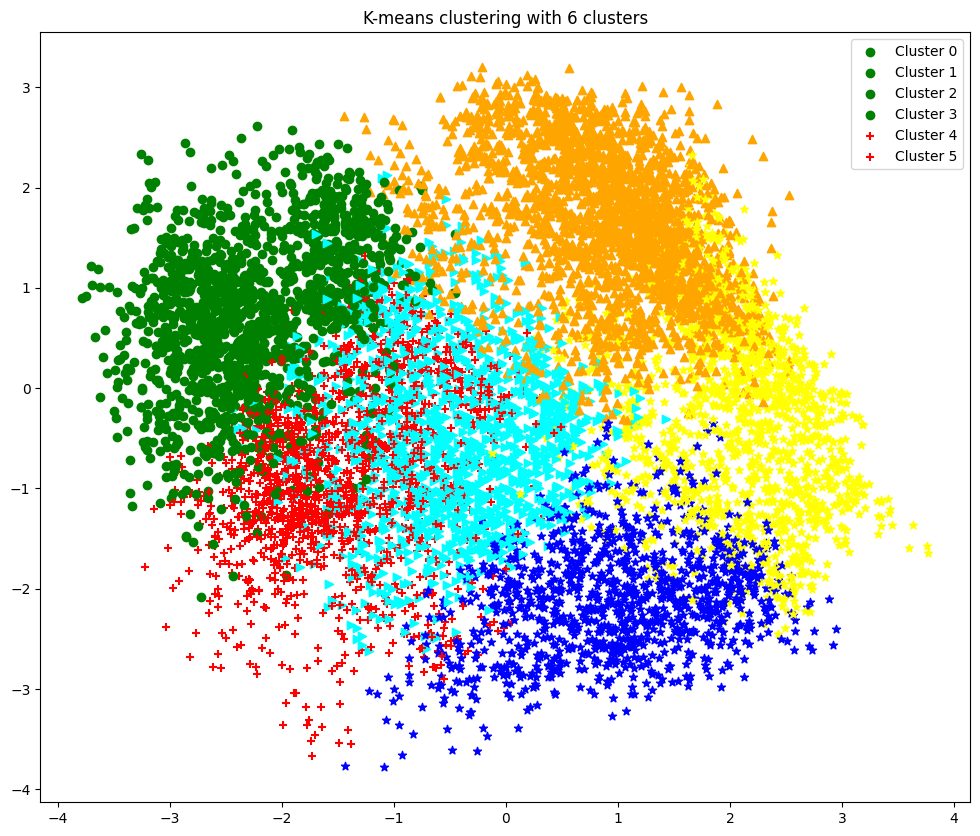

In [11]:
# Visualize the clusters using PCA
plt.figure(figsize=(12, 10))
for i in range(pca_model.shape[0]):
    if labels[i] == 0:
        plt.scatter(pca_model[i, 0], pca_model[i, 1], c='orange', marker='^')# pca model is the result of pca.fit_transform
    elif labels[i] == 1:
        plt.scatter(pca_model[i, 0], pca_model[i, 1], c='g', marker='o')
    elif labels[i] == 2:
        plt.scatter(pca_model[i, 0], pca_model[i, 1], c='b', marker='*')
    elif labels[i] == 3:
        plt.scatter(pca_model[i, 0], pca_model[i, 1], c='yellow', marker='*')
    elif labels[i] == 4:
        plt.scatter(pca_model[i, 0], pca_model[i, 1], c='cyan', marker='>')
    elif labels[i] == 5:
        plt.scatter(pca_model[i, 0], pca_model[i, 1], c='red', marker='+')

plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title('K-means clustering with 6 clusters')
plt.show()

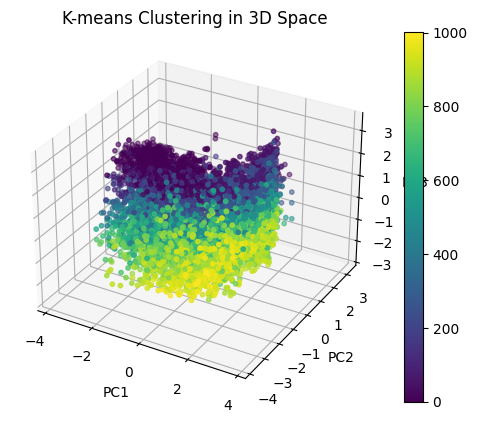

In [15]:
num_components = 5 # Using 3 principal components for 3D plot
pca_model = pca(x, num_components)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot using the first three principal components and cluster labels
sc = ax.scatter(pca_model[:, 0], pca_model[:, 1], pca_model[:, 2], c=y, cmap='viridis', s=10)
fig.colorbar(sc)  # Add a colorbar to indicate the cluster labels

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('K-means Clustering in 3D Space')
plt.show()